Question 1

In [3]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/glass.csv')

data.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [4]:
print(data.isna().sum())

#found no NULL values

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


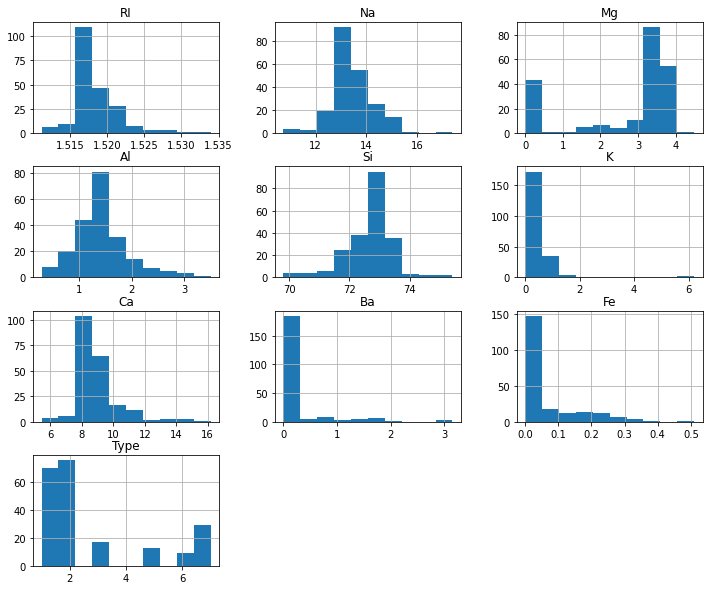

In [5]:
import matplotlib.pyplot as plt

data.hist(figsize=[12, 10])
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = np.array(data.drop(['Type'], axis = 1).copy())
Y = np.array(data['Type'])

X = scaler.fit_transform(X)


labels = np.unique(Y).shape[0]

print(labels)
print(X.shape)
print(Y.shape)


6
(214, 9)
(214,)


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

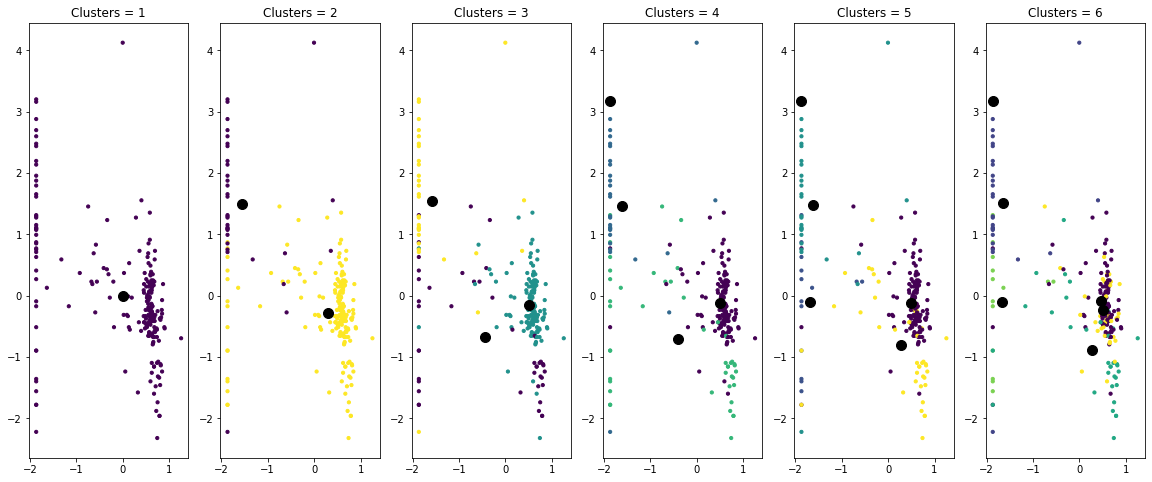

In [7]:
from sklearn.cluster import KMeans

fig, ax = plt.subplots(1, labels, figsize = (20,8))

for lb in range(labels):
    KM = KMeans(n_clusters=lb+1).fit(X)
    centroids = KM.cluster_centers_

    ax[lb].scatter(X[:, 2], X[:, 3], c = KM.labels_, s = 10)
    ax[lb].set_title("Clusters = "+str(lb+1))
    ax[lb].scatter(centroids[:,2] , centroids[:,3] , s = 100, color = 'k')

In [30]:
from sklearn.metrics import silhouette_score


for lb in range(1, labels):
    KM = KMeans(n_clusters=lb+1).fit(X)
    pred = KM.predict(X).reshape(-1, 1)

    print("Silhouette_score for {} Clusters is {}".format(lb+1, silhouette_score(pred, Y)))


Silhouette_score for 2 Clusters is -0.3698379448460016
Silhouette_score for 3 Clusters is -0.12236181813472817
Silhouette_score for 4 Clusters is -0.132854655589035
Silhouette_score for 5 Clusters is -0.1392812336996111
Silhouette_score for 6 Clusters is -0.2019891580604945


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

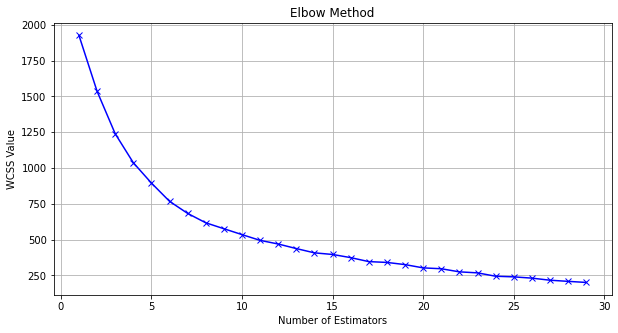

In [31]:
K_values = range(1, 30)

inertias = []
for i in K_values:
    KM = KMeans(n_clusters=i)
    KM.fit(X)
    inertias.append(KM.inertia_)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(K_values, inertias, 'bx-')

plt.xlabel('Number of Estimators')
plt.ylabel('WCSS Value')
plt.title('Elbow Method')
plt.grid()
plt.show()


In [32]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score

BC = BaggingClassifier(estimator=KNN(n_neighbors = 3), n_estimators=10)

KNN_=  KNN(n_neighbors = 4)
KNN_.fit(X, Y)
Y_pred_knn = KNN_.predict(X) 

BC.fit(X, Y)
Y_pred = BC.predict(X)


print("Accuracy with Bagging with KNN classifier :", accuracy_score(Y_pred, Y))

print("Accuracy (without Bagging) of KNN classifier :", accuracy_score(Y_pred_knn, Y))
# print(Y)

Accuracy with Bagging with KNN classifier : 0.8598130841121495
Accuracy (without Bagging) of KNN classifier : 0.8130841121495327


Question 2

In [48]:

import random
import matplotlib.pyplot as plt


class KMeans:
    def __init__(self, n_clusters):
        self.K = n_clusters
        self.max_iterations = 100
        self.centroids = []
        self.clusters = [[]]*n_clusters

    def fit(self, X, indexes=  None):
        rows = X.shape[0]
        columns = X.shape[1]
        
        if indexes == None:
            self.centroids = np.zeros((self.K, columns))

            for i in range(self.K):
                self.centroids[i] = X[random.randrange(rows)]
        else:
            self.centroids = X[indexes]

        for i in range(self.max_iterations):

            self.clusters = [[] for _ in range(self.K)]
            for index in range(rows):

                dists = np.sqrt(np.sum((self.centroids-X[index])**2, axis = 1))

                self.clusters[np.argmin(dists)].append(index)
 
            
            new_centroids = np.zeros((self.K, columns))

            for idx in range(self.K):
                new_centroids[idx] = np.mean(X[self.clusters[idx]], axis=0)

            if not (self.centroids - new_centroids).any():
                break
            
            self.centroids = new_centroids.copy()

            for i in range(self.K):
                if len(self.clusters[i]) == 0:
                    self.centroids[i] = X[random.randrange(rows)]

        
    def predict(self, X):

        y_pred = np.zeros(X.shape[0]) 

        for i in range(self.K):
            y_pred[self.clusters[i]] = i
        return y_pred

    def plot_centroids(self):
        fig, ax = plt.subplots(self.K//10, 10, figsize = (20, 8))

        for i, ax_ in enumerate(ax.flat):
            ax_.imshow(KM.centroids[i].reshape(64, 64), cmap='gray')


In [49]:
import sklearn.datasets as dt

data = dt.fetch_olivetti_faces(data_home=None, shuffle=False, random_state=0, download_if_missing=True)

X = data['data']
Y = data['target']

print(X.shape)
print(Y.shape, '\n')
print(X[0:5])


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
(400, 4096)
(400,) 

[[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]
 [0.45454547 0.47107437 0.5123967  ... 0.15289256 0.15289256 0.15289256]
 [0.3181818  0.40082645 0.49173555 ... 0.14049587 0.14876033 0.15289256]
 [0.1983471  0.19421488 0.19421488 ... 0.75206614 0.75206614 0.73966944]
 [0.5        0.54545456 0.58264464 ... 0.17768595 0.17355372 0.17355372]]


In [50]:
idx = random.sample(range(0, 400), 40)

KM = KMeans(n_clusters = 40)
KM.fit(X, idx)


Y_pred = KM.predict(X)


for i in range(40):
    print("{} -> {}".format(i, np.count_nonzero(Y_pred == i)))


0 -> 6
1 -> 1
2 -> 3
3 -> 2
4 -> 7
5 -> 16
6 -> 9
7 -> 4
8 -> 10
9 -> 9
10 -> 2
11 -> 19
12 -> 2
13 -> 12
14 -> 24
15 -> 3
16 -> 15
17 -> 11
18 -> 16
19 -> 10
20 -> 10
21 -> 14
22 -> 3
23 -> 3
24 -> 11
25 -> 10
26 -> 5
27 -> 2
28 -> 5
29 -> 15
30 -> 18
31 -> 10
32 -> 21
33 -> 12
34 -> 8
35 -> 13
36 -> 15
37 -> 6
38 -> 26
39 -> 12


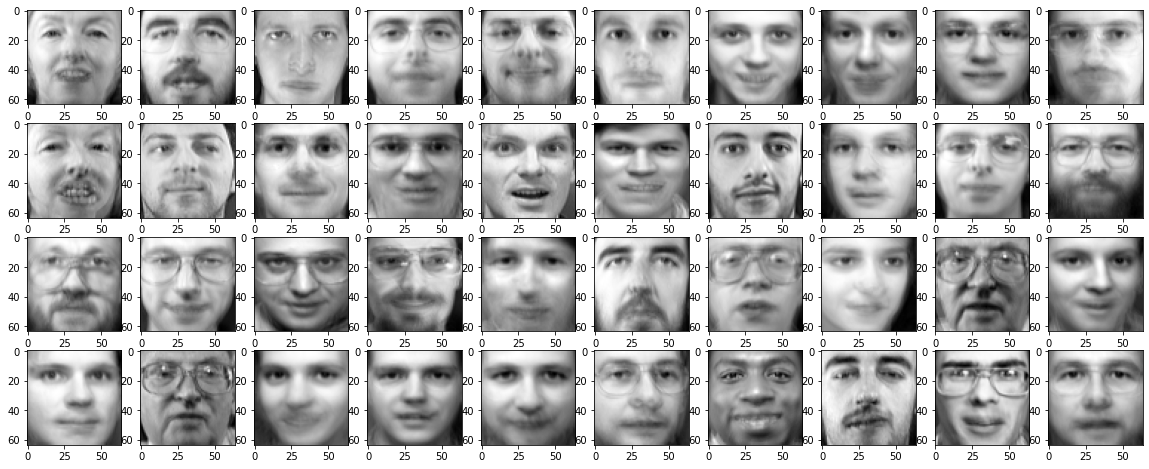

In [114]:
KM.plot_centroids()


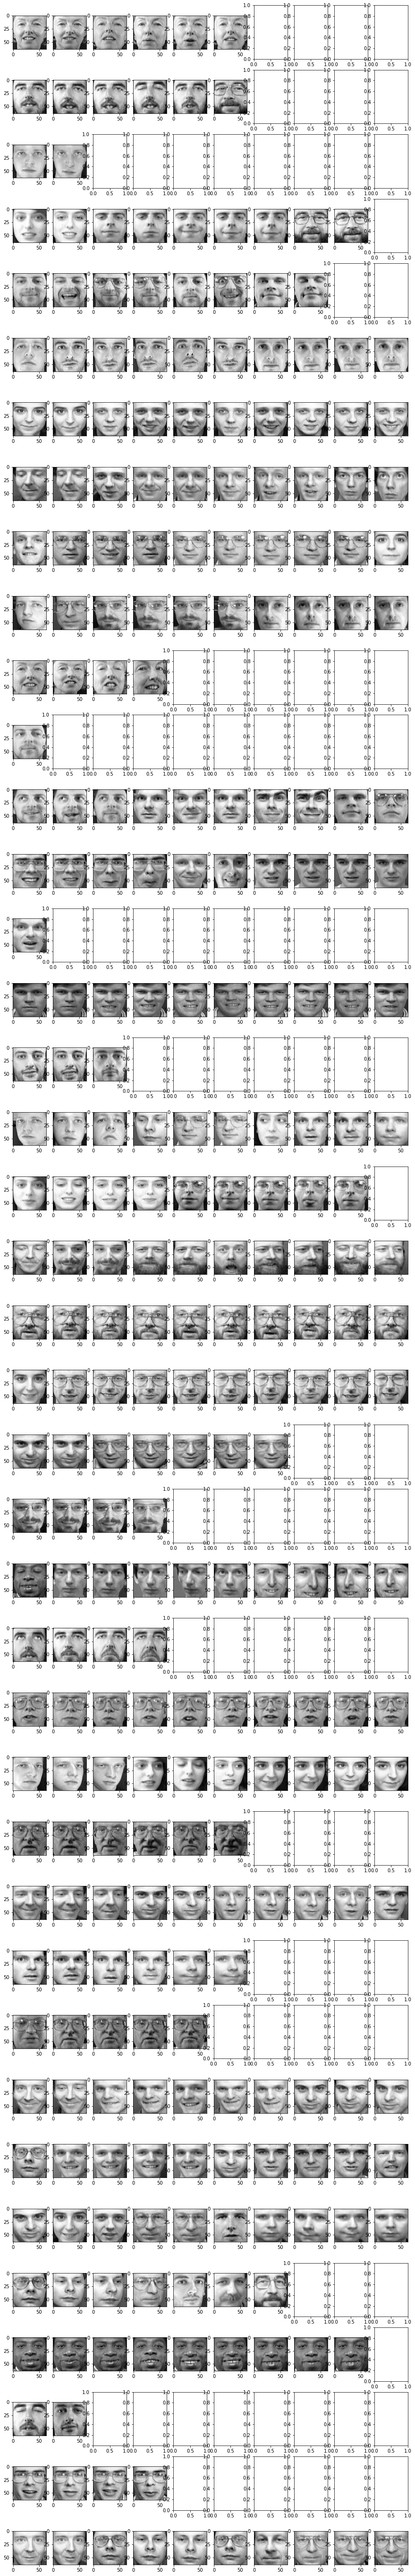

In [115]:
cls = KM.clusters
import matplotlib.pyplot as plt

fig, ax = plt.subplots(40, 10, figsize = (15, 100))
for i in range(40):
    for j in range(10):
        if j < len(cls[i]):
            ax[i, j].imshow(X[cls[i][j]].reshape(64, 64), cmap='gray')


0 -> 8
1 -> 58
2 -> 40
3 -> 38
4 -> 9
5 -> 63
6 -> 42
7 -> 59
8 -> 12
9 -> 71


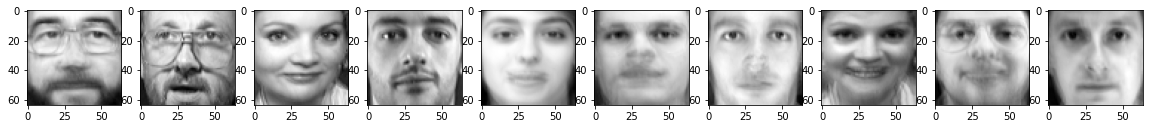

In [51]:
import matplotlib.pyplot as plt

idx = random.sample(range(0, 400), 10)

KM2 = KMeans(n_clusters = 10)
KM2.fit(X, idx)

Y_pred2 = KM2.predict(X)

for i in range(10):
    print("{} -> {}".format(i, np.count_nonzero(Y_pred2 == i)))
KM2.plot_centroids()


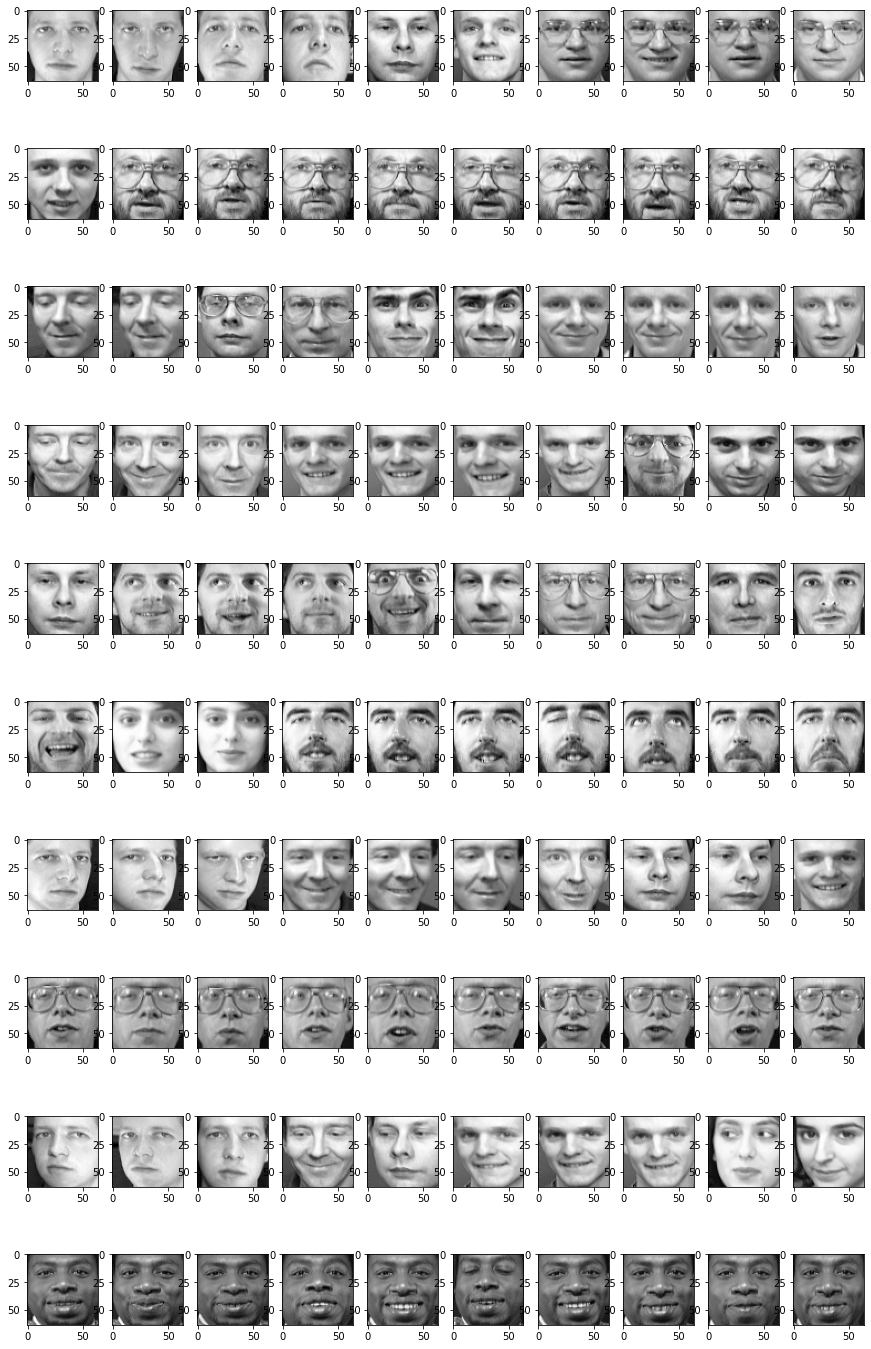

In [117]:
cls = KM2.clusters

fig, ax = plt.subplots(10, 10, figsize = (15, 25))
for i in range(10):
    for j in range(10):
        if j < len(cls[i]):
            ax[i, j].imshow(X[cls[i][j]].reshape(64, 64), cmap='gray')

In [54]:
def SSE(true, pred):
    sse = 0.0
    for i in range(len(true)):
        error = true[i] - pred[i]
        sse += error**2
    return sse

print("The Sum of Squared Error for Part c is :", SSE(Y_pred, Y))
print("The Sum of Squared Error for Part f is :", SSE(Y_pred2, Y))

The Sum of Squared Error for Part c is : 103324.0
The Sum of Squared Error for Part f is : 142805.0


Question 3

In [33]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/Wholesale customers data.csv')

data.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [34]:
print(data.isna().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


array([[<AxesSubplot:title={'center':'Channel'}>,
        <AxesSubplot:title={'center':'Region'}>,
        <AxesSubplot:title={'center':'Fresh'}>],
       [<AxesSubplot:title={'center':'Milk'}>,
        <AxesSubplot:title={'center':'Grocery'}>,
        <AxesSubplot:title={'center':'Frozen'}>],
       [<AxesSubplot:title={'center':'Detergents_Paper'}>,
        <AxesSubplot:title={'center':'Delicassen'}>, <AxesSubplot:>]],
      dtype=object)

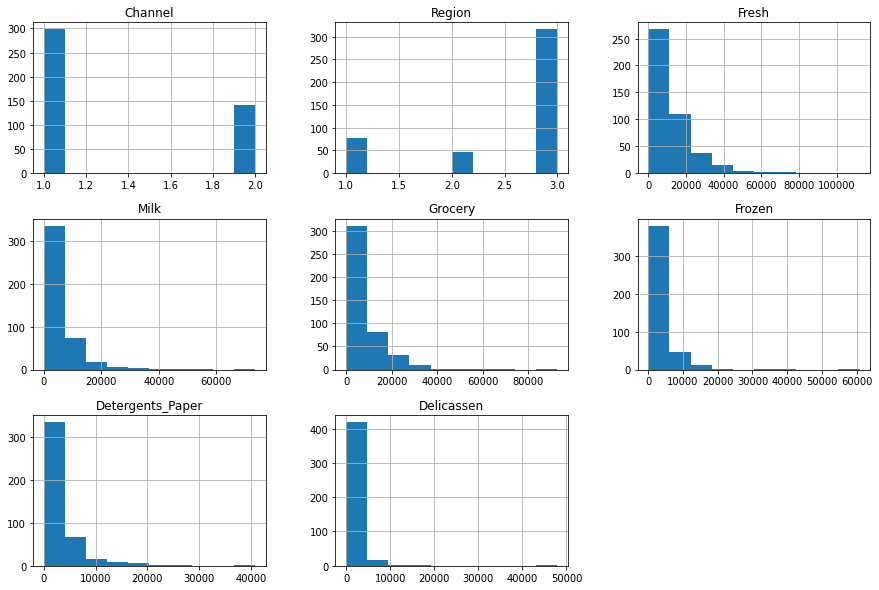

In [35]:
data.hist(figsize = (15, 10))

In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

X = data.drop(['Channel'], axis = 1).copy()
Y = data['Channel']

PC = PCA(n_components = 2)
X_sc = PC.fit_transform(X)

MMS = MinMaxScaler()

X = MMS.fit_transform(X)

print(X[0:5])

[[1.         0.11294004 0.13072723 0.08146416 0.0031063  0.0654272
  0.02784731]
 [1.         0.06289903 0.13282409 0.10309667 0.02854842 0.08058985
  0.03698373]
 [1.         0.05662161 0.11918086 0.08278992 0.03911643 0.08605232
  0.16355861]
 [1.         0.11825445 0.01553586 0.04546385 0.10484189 0.01234568
  0.03723404]
 [1.         0.20162642 0.07291369 0.07755155 0.063934   0.04345483
  0.10809345]]


The features with maximum Covariance are 3 and 5



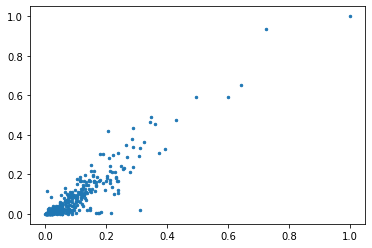

In [41]:
import matplotlib.pyplot as plt

COV = np.cov(X.T)

max = COV[0, 1]
ans = [0, 1]


for i in range(len(COV)):
    for j in range(i+1, len(COV)):
        if(COV[i, j] > max):
            max = COV[i, j]
            ans = [i, j]
    

print("The features with maximum Covariance are {} and {}\n".format(ans[0], ans[1]))


plt.scatter(X[:, ans[0]], X[:, ans[1]], s = 6)
plt.show()



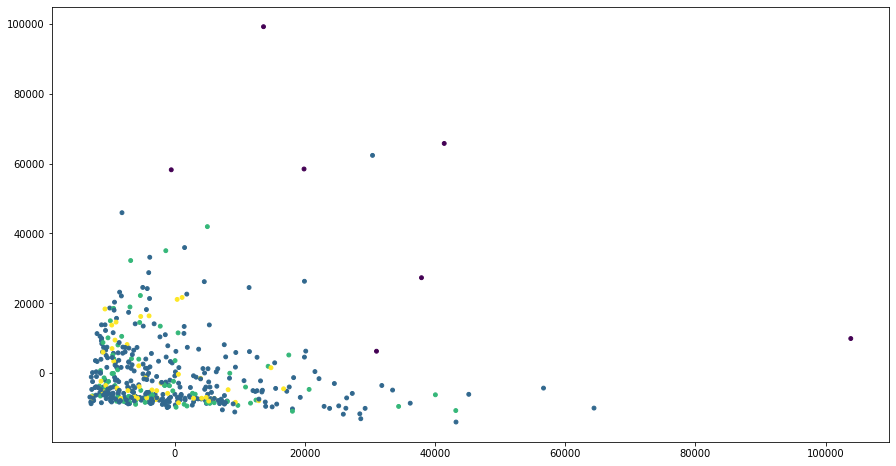

In [123]:
from sklearn.cluster import DBSCAN

DBS = DBSCAN().fit(X)

Y = DBS.labels_

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
plt.scatter(X_sc[:, 0], X_sc[:, 1], c = Y, s = 15)
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


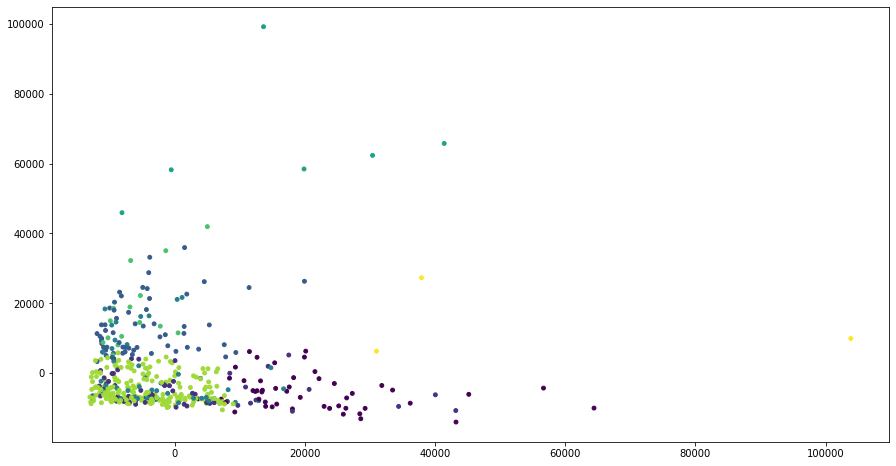

In [124]:
from sklearn.cluster import KMeans

KM = KMeans()

KM.fit(X)
Y_KM = KM.predict(X)

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
plt.scatter(X_sc[:, 0], X_sc[:, 1], c = Y_KM, s = 15)

plt.show()




In [45]:
from sklearn.datasets import make_moons

data = make_moons(n_samples = 2000, noise = 0.1)
X = data[0]
Y = data[1]

for i in range(400):
    idx = np.random.randint(0, X.shape[0])
    X = np.vstack([X, np.random.normal(X[idx], 0.05)])
    Y = np.append(Y, Y[idx])


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'KMeans Classifier')

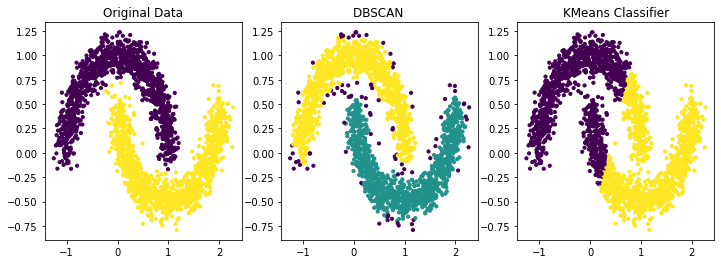

In [46]:
from sklearn.cluster import DBSCAN

DBS = DBSCAN(eps = 0.1, min_samples=20)
dbscan_labels = DBS.fit_predict(X)

KM_def = KMeans()

KM = KMeans(n_clusters = 2)
KM_def
KM_labels = KM.fit(X).predict(X)


plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', s=10)
plt.title('Original Data')
plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=10)
plt.title('DBSCAN ')
plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=KM_labels, cmap='viridis', s=10)
plt.title('KMeans Classifier')
